# DataMining Project
## Blockchain Fraud Prediction using Machine Learning
### AIT ELAHMADI Farah

## Introduction
The goal of this project is to identify instances of blockchain fraud through the application of machine learning. To do so, a dataset with various features such as transaction values, time intervals between transactions, etc., is utilized along with a binary label (FLAG) indicating whether a fraud has occurred (1) or not (0). The project will follow a supervised learning approach, where several classification models will be evaluated and one or more will be chosen based on their balance of recall score and false positive predictions.

## Importing Libraries
The following cell contains all the necessary library imports for the project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

## Exploring our Dataset
Creating a DataFrame from the data in .csv format, which is sourced from Kaggle :(https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset).

In [2]:
df = pd.read_csv ('transaction_dataset.csv')

Examining the data by checking its size, the first 5 rows, and some basic statistics like average, median, etc.

In [3]:
df.shape #number of rows and columns

(9841, 51)

In [4]:
df.head() #first 5 rows

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
df.describe() #view some measures of central tendency (mean etc.)

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In this dataset, we see that the columns 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract', seem to have no values apart from 0, so we can remove them:

In [6]:
df = df.drop(columns =[' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract']) #removing columns which do add value

Understanding the schema of the dataset.

In [7]:
df.info() #understanding dataset schema

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 44 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

Three columns: Address, ERC20 most sent token type and ERC20_most_rec_token_type, are of type 'object', which cannot be used in the modeling functions used ahead. we should remove them:

In [8]:
df = df.select_dtypes(exclude=['object'])

Additionally, the columns: 'Unnamed: 0' and 'Index', provide an index which is not of value to the modeling. Removing them:

In [9]:
df = df.drop(columns =['Unnamed: 0', 'Index'])

As stated earlier, the Fraud instances are indicated by the column 'FLAG' which has binary values. Understanding the balance of the label is important.

In [10]:
df['FLAG'].value_counts() #checking the label balance

0    7662
1    2179
Name: FLAG, dtype: int64

This means that in the given dataset, the proportion of data labeled as "fraud" (with the flag set to 1) is 22.14%. We has decided to not make any changes to the imbalance in the data labels since the proportion of fraud is not too low.

Droppping rows with NAN values.

In [11]:
df = df.dropna()

Plotting the correlation between features of the dataset. This allows to better understand if any features are very strongly correlated with each other.

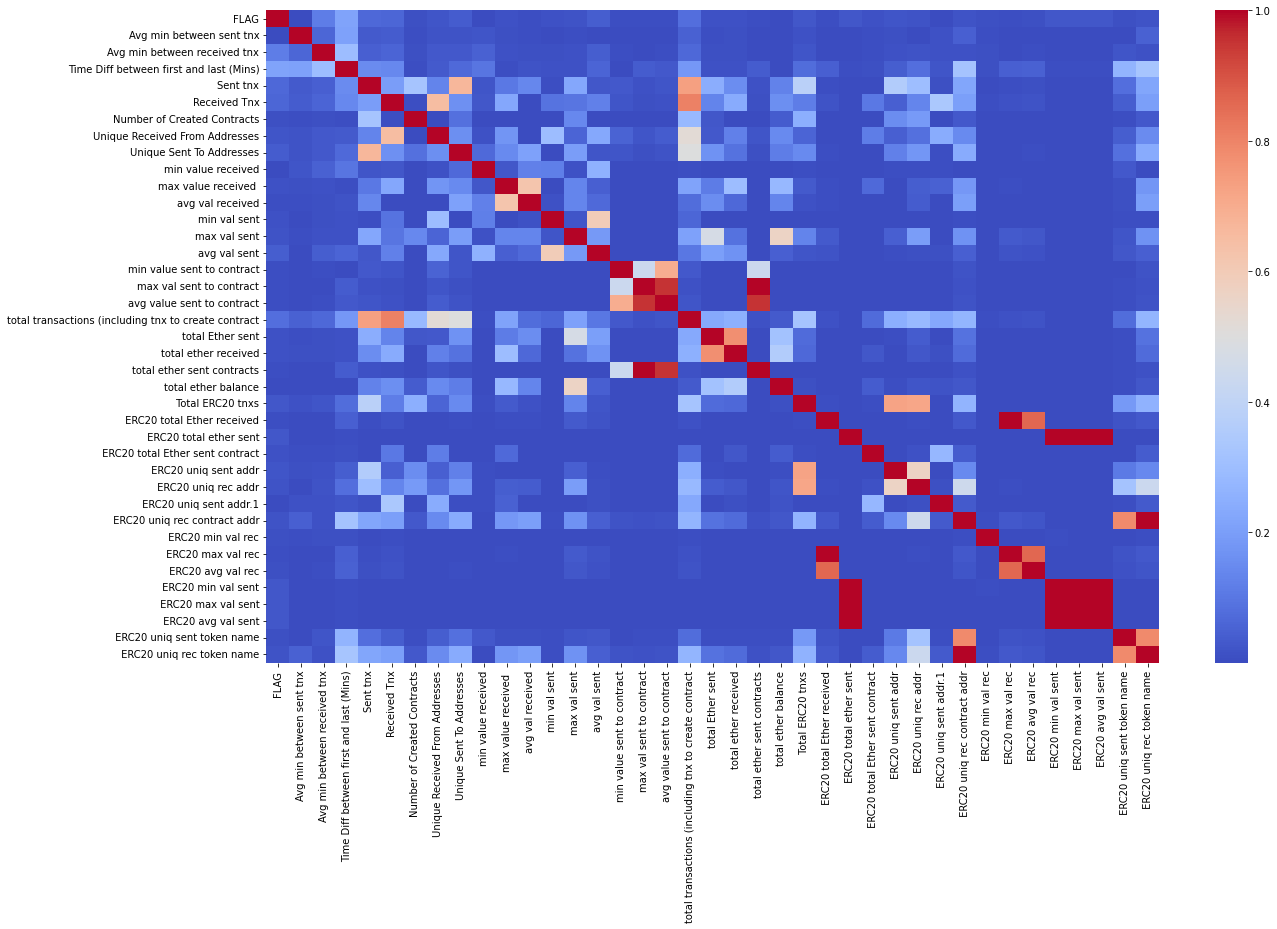

In [12]:
corr = df.corr()
plt.figure(figsize=(20,12))
sn.heatmap(np.abs(corr), cmap='coolwarm')
plt.show()

Looking at the areas in the correlation matrix where 2 features are highly correlated (depicted by peach/orange color), we do not see any surprises. For example average value received is highly correlated with total ether received, which is expected.



Building the Feature set as well as the Labels. Using conventions of 'X' and 'y'

In [13]:
X = df.drop('FLAG',axis = 1)
y = df.FLAG

Splitting the data into a training set which will be used to train the model(s) as well as a test set, which will be unseen by the model and therefore can be used to test is prediction capabilities. Using a 70-30 split.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #random_state allows for the RNG to be deterministic for reproduction and testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6308, 38) (6308,)
(2704, 38) (2704,)


## Feature Selection
Using 2 statistical techniques to reduce feature set to include those which have a higher importance in determining the target variable : Chi Square as well as ANOVA F-value. Additionally using the SelectKBeat function to pick the top features after applying the techniques mentioned above. 

In [15]:
X = df.drop('total ether balance', axis = 1) #Chi square requires non-negative values, therefore dropping 'total ether balance'

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #random_state allows for the RNG to be deterministic for reproduction and testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6308, 38) (6308,)
(2704, 38) (2704,)


#### Chi Square:

In [17]:
X_chi_best= SelectKBest(chi2, k=35).fit(X_train, y_train)
mask = X_chi_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
 if bool:
  new_feat.append(feature)

X = df[new_feat]
X = df.drop('FLAG',axis = 1)

new_feat

['FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'max val sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 ' Total ERC20 tnxs',
 ' ERC20 total Ether received',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec contract addr',
 ' ERC20 min val rec',
 ' ERC20 max val rec',
 ' ERC20 avg val rec',
 ' ERC20 min val sent',
 ' ERC20 max val sent',
 ' ERC20 avg val sent',
 ' ERC20 uniq sent token name',
 ' ERC20 uniq rec token name']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #random_state allows for the RNG to be deterministic for reproduction and testing 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6308, 38) (6308,)
(2704, 38) (2704,)


#### ANOVA F-value:

In [19]:
X_f_best= SelectKBest(f_classif, k=32).fit(X_train, y_train)
mask = X_f_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
 if bool:
  new_feat.append(feature)

X = df[new_feat]
X = df.drop('FLAG',axis = 1)
new_feat

['Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 ' Total ERC20 tnxs',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec contract addr',
 ' ERC20 min val rec',
 ' ERC20 avg val rec',
 ' ERC20 min val sent',
 ' ERC20 max val sent',
 ' ERC20 avg val sent',
 ' ERC20 uniq sent token name',
 ' ERC20 uniq rec token name']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #random_state allows for the RNG to be deterministic for reproduction and testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6308, 38) (6308,)
(2704, 38) (2704,)


## Decision Tree Classifier
The first model being explored is the Decision Tree, more specifically a binary Decision Tree model, which creates a tree behind the scenes based on the features and then makes predictions based on traversal through the tree. Using the sklearn function to invoke the model.

In [21]:
dt = DecisionTreeClassifier() #Decision Tree classifer object
dt = dt.fit(X_train,y_train) #Train by fitting to training set
y_pred = dt.predict(X_test) #Predict fraud/label/'FLAG' on the test set

Evaluating the model. First we will calculate Accuracy, which is defined as the proportion of the predictions in the test set were correct.


In [22]:
dt_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",dt_acc)

Accuracy: 0.9626479289940828


The issue with using accuracy to evaluate model performance is that, given the imbalance of the data, even a random guess of all items being 'Not fraud' would yield a high accuracy. Therefore, we are better off using recall, which is defined as the proportion of the fraud predicted correctly. Mathematically:

$ Recall = \frac {True Positives} {True Positives + False Negatives} $

In [23]:
dt_rec = metrics.recall_score(y_test, y_pred)
print("Recall:",dt_rec)

Recall: 0.9156626506024096


### Tuning the Decision Tree
The Decision Tree Classifier has a parameter called max_depth which essentially caps the maximum depth of the tree. We will use various values for max_depth to attempt to increase our recall score. In order to do this, I have created a quick ***helper function*** rather than using the out of the box paramGrid and CrossValidator functions from scikit learn, since we want to customize the tuning to our specific needs. This function is built so it can be used in later models as well.

#### Helper Function for Tuning Models

In [24]:
# Initializing the global variables
Keymax=0
dt_rec=0
dt_fp=0
lr_rec=0
lr_fp=0
rf_rec=0
rf_fp=0
gbt_rec=0
gbt_fp=0

# Defining the main function 'tuner' which takes in 3 parameters:
# - model: the type of machine learning model to be tuned
# - lo (optional): the lower bound of the parameter search range
# - hi (optional): the upper bound of the parameter search range
def tuner(model, lo=0, hi=100): 
  
  # Creating a dictionary to store the recall scores for each parameter value
  paramDict = {}
  
  # Making the global variables accessible within the function
  global Keymax
  global dt_rec
  global rf_rec
  global gbt_rec
  global dt_fp
  global lr_fp
  global rf_fp
  global gbt_fp
  global y_pred
  global y_test

  # Defining a function to calculate the false positives
  def perf_measure(y_test, y_pred): # (source: https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python)
    FP = 0
    y_test_array = y_test.to_list()
    # Iterating through the predictions
    for i in range(len(y_pred)): 
        # If a prediction is a positive and it's not the same as the actual value
        if y_pred[i] == 1.0 and y_test_array[i] != y_pred[i]:
           # Incrementing the false positive count
           FP += 1
    return(FP)

# Checking the type of model being tuned
  if model == 'dt':
    while lo <= hi:
      m = DecisionTreeClassifier(max_depth=lo)
      m = m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      rec = metrics.recall_score(y_test, y_pred)
      paramDict.update({lo: rec})
      lo += 1
    # Getting the key (parameter value) that yields the highest recall score
    Keymax = max(paramDict, key=paramDict.get) 
    # Storing the highest recall score
    dt_rec = paramDict[Keymax]
    # Calculating the false positives using the perf_measure function
    dt_fp = perf_measure(y_test, y_pred)
    # Returning the best parameter value, recall score, and false positives
    return Keymax, dt_rec, dt_fp

# Same process for Logistic Regression model
  elif model == 'lr':
    lrParams = ["l2", "none"]
    for param in lrParams:
      m = LogisticRegression(max_iter=100000, penalty=param)
      m = lr.fit(X_train,y_train) 
      y_pred = m.predict(X_test) 
      rec = metrics.recall_score(y_test, y_pred)
      paramDict.update({param: rec})
    Keymax = max(paramDict, key=paramDict.get) 
    lr_rec = paramDict[Keymax]
    lr_fp = perf_measure(y_test, y_pred)
    return Keymax, lr_rec, lr_fp  
    
  elif model == 'rf':
    while lo <= hi:
      m = RandomForestClassifier(n_estimators=lo)
      m = m.fit(X_train,y_train)
      y_pred = m.predict(X_test) 
      rec = metrics.recall_score(y_test, y_pred)
      paramDict.update({lo: rec})
      lo += 1
    Keymax = max(paramDict, key=paramDict.get)
    rf_rec = paramDict[Keymax]
    rf_fp = perf_measure(y_test, y_pred)
    return Keymax, rf_rec, rf_fp


  elif model == 'gbt':
    while lo <= hi:
      m = GradientBoostingClassifier(n_estimators=lo)
      m = m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      rec = metrics.recall_score(y_test, y_pred)
      paramDict.update({lo: rec})
      lo += 1
    Keymax = max(paramDict, key=paramDict.get)
    gbt_rec = paramDict[Keymax]
    gbt_fp = perf_measure(y_test, y_pred)
    return Keymax, gbt_rec, gbt_fp
 


Using the tuner to get the best possible parameter value as well as corresponding recall score.
In this specific case, lo=5 and hi=100, so the range of max_depth values will be [5, 6, ..., 100], and the tuner function will train and evaluate 100 Decision Tree models to find the best max_depth value.

In [25]:
tuner('dt', 5, 100)

(23, 0.9228915662650602, 64)

We did improve the recall! Our tuning was successful! 

Creating a Confusion Matrix and visualizing it to understand the True Negatives,False Negatives, True Positives and False Positives.

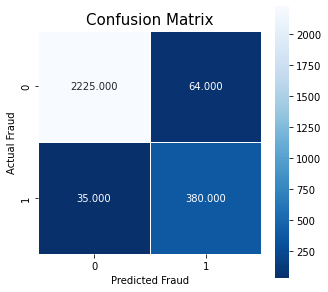

In [26]:
dt_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sn.heatmap(dt_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Fraud');
plt.xlabel('Predicted Fraud');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

## Logistic Regression
The next model being explored is the logistic regression model, more specifically a binary logistic regression model, which models the probability of a binary class. Again, using the sklearn function to invoke the model.

The flow of code is similar to that of the Decision Tree.

In [27]:
lr = LogisticRegression(max_iter=100000) #Logistic Regression classifer object
lr = lr.fit(X_train,y_train) #Train by fitting to training set
y_pred = lr.predict(X_test) #Predict fraud/label/'FLAG' on the test set

In [28]:
lr_rec = metrics.recall_score(y_test, y_pred)
print("Recall:",lr_rec)

Recall: 0.0024096385542168677


In [29]:
tuner('lr')

('l2', 0.0024096385542168677, 2)

Since the Logistic Regression model has a very low recall score of approximately 0.4%, it is in it current form a less valuable prediction tool.

## Random Forest
The next model being explored is the Random Forest model, which first creates multiple bootstrapped datasets from our larger data set and then creates decision trees for each of those bootstrapped sets. The final prediction is based on a majority vote from all the trees. Again, using the sklearn function to invoke the model.

The flow of code is similar to that of the Decision Tree.

In [30]:
rf = RandomForestClassifier() #Random Forest Classifier object
rf = rf.fit(X_train,y_train) #Train by fitting to training set
y_pred = rf.predict(X_test) #Predict fraud/label/'FLAG' on the test set

In [31]:
rf_rec = metrics.recall_score(y_test, y_pred)
print("Recall:",rf_rec)

Recall: 0.9180722891566265


### Tuning the Random Forest Classifier

In [32]:
tuner('rf', 5, 100)

(5, 0.927710843373494, 11)

We did improve the recall! Our tuning was successful!


Creating a Confusion Matrix and visualizing it to understand the True Negatives,False Negatives, True Positives and False Positives.

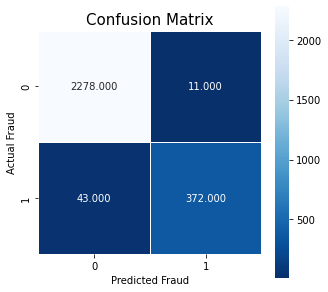

In [33]:
rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sn.heatmap(rf_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Fraud');
plt.xlabel('Predicted Fraud');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

## Gradient Boost
The next model being explored is the Gradient Boost model, which builds an additive model in a forward stage-wise fashion allowing for the optimization of arbitrary differentiable loss functions. Again, using the sklearn function to invoke the model.

The flow of code is similar to that of the Decision Tree.

In [34]:
gbt = GradientBoostingClassifier() #Gradient Boosting Classifier object

gbt = gbt.fit(X_train,y_train) #Train by fitting to training set

y_pred = gbt.predict(X_test) #Predict fraud/label/'FLAG' on the test set

In [35]:
gbt_rec = metrics.recall_score(y_test, y_pred)
print("Recall:",gbt_rec)

Recall: 0.9156626506024096


### Tuning the Gradient Boost

In [36]:
tuner('gbt', 5, 50)

(50, 0.8722891566265061, 11)

We did not improve the recall! We will omit the n_estimators parameter for the Gradient Boost Classifier.


Creating a Confusion Matrix and visualizing it to understand the True Negatives,False Negatives, True Positives and False Positives.

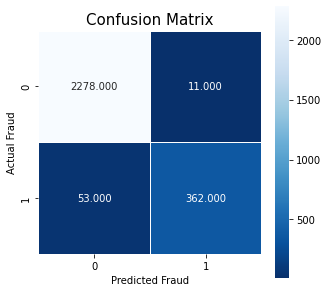

In [37]:
gbt_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sn.heatmap(gbt_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Fraud');
plt.xlabel('Predicted Fraud');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

## Conclusion

The following are the results from the Classification Models that we have run so far:


In [38]:
data = [["Decision tree", ('%.2f' % (dt_rec*100)), dt_fp],["Logistic Regression", ('%.2f' % (lr_rec*100)), lr_fp],["Random Forest", ('%.2f' % (rf_rec*100)), rf_fp],["Gradient Boost", ('%.2f' % (gbt_rec*100)), gbt_fp]]
resultsDf = pd.DataFrame(data, columns=["Model", "Recall Score", "False Positives"])
resultsDf

,Model,Recall Score,False Positives
0,Decision tree,92.29,64
1,Logistic Regression,0.24,2
2,Random Forest,92.77,11
3,Gradient Boost,87.23,11


If we only look at the Recall score, we may draw the following conclusions:
*   The Decision Tree Model and the Random Forest Model are the best.
*   The Decision Tree and the Random Forest are equally good.




#### On closer Inspection...
we will notice that the False Positives in the case of the Random Forest model is less than 20% of that of the Decision Tree which makes it a superior prediction tool. In a real world scenario, if we wanted to have an intervention of some sort on the cases of predicted fraud, we would prefer to have a lower false positive rate so that we do not intervene in case of genuine transactions.
